# MVN activation function

This code explains the logic of mvn activation function for an easy understanding.

For further information refer to the original papers of Naum Aizenberg:
 - [Multivalued threshold functions](https://link.springer.com/article/10.1007%2FBF01068667)
 - [A GENERALIZATION OF THE THRESHOLD FUNCTIONS](https://www.jstor.org/stable/43667575?casa_token=QrhCiytSlCUAAAAA%3ARRwNRt0TRmfddbOwMP_Si5cqYg6FzCa44WtvX2Ac2yPK_xkA6n2ycfuyLzvWvKFdh-L9JfShlDV6elRcjgtiuDgfKEKFOfA6fqxCIUX5r9SG4Ou7hETN&seq=1#metadata_info_tab_contents)
 
According to these works: 
*A multi-valued neuron (MVN) is a neural element with n inputs and one output lying on the unit circle, and with complex-valued weights.*

In [13]:
# We first import everything
import matplotlib.pyplot as plt
from cvnn.activations import mvn_activation
import tensorflow as tf
import numpy as np

For a start we will create complex valued points to use as an example.

In [16]:
x = tf.constant([-2, 1.0, 0.0, 1.0, -3], dtype=tf.float32)
y = tf.constant([-2.5, -1.5, 0.0, 1.0, 2], dtype=tf.float32)
z = tf.complex(x, y)
result = mvn_activation(z)

MVN function divides the phase into `k` sections and cast the input phase to the closest of those k values while also fizing the amplitude to 1.

The equation would be

$$
f(z) = \exp^{\frac{i 2 \pi a}{ k } }
$$

with $a$ so that $$\frac{i 2 \pi a}{ k }  \leq arg(z) \le \frac{i 2 \pi (a+1)}{ k } $$

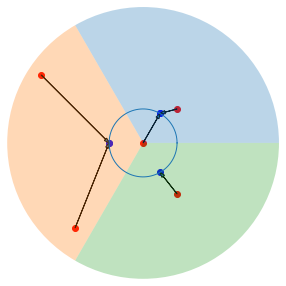

In [19]:
k = 3
result = mvn_activation(z, k=k)
# cnums = np.arange(5) + 1j * np.arange(6, 11)]
ax = plt.axes()
ax.scatter(tf.math.real(z), tf.math.imag(z), color='red')
ax.scatter(tf.math.real(result), tf.math.imag(result), color='blue')

# Plot arrows of the mapping road
for x, y, dx, dy in zip(tf.math.real(z), tf.math.imag(z),
                        tf.math.real(result) - tf.math.real(z),
                        tf.math.imag(result) - tf.math.imag(z)):
    ax.arrow(x, y, dx, dy, length_includes_head=True, head_width=0.1)
# PLot unit circle
t = np.linspace(0, np.pi * 2, 100)
ax.plot(np.cos(t), np.sin(t), linewidth=1)

yabs_max = abs(max(ax.get_ylim(), key=abs))
xabs_max = abs(max(ax.get_xlim(), key=abs))
axis_max = max(yabs_max, xabs_max)

# Divide map on the different zones
ax.pie(np.ones(k) / k, radius=4, wedgeprops={'alpha': 0.3})

ax.set_ylim(ymin=-axis_max, ymax=axis_max)
ax.set_xlim(xmin=-axis_max, xmax=axis_max)
plt.show()

## Continous values

If `k` is not given, it will use $k \to \infty$ making it an equivalence of just mapping the input to the unitary circle (keeps the phase but changes the amplitude to 1).
This is mathematically $$ f(z) = \exp^{i arg(z)} .$$

For $z \neq 0$ this is also $$ f(z) = \frac{z}{|z|} .$$

(-5.450285282272716, 5.450285282272716)

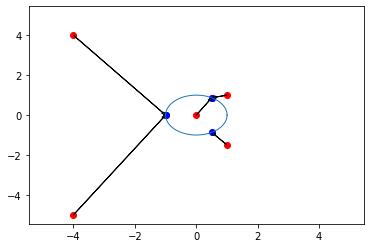

In [12]:
ax = plt.axes()
ax.scatter(tf.math.real(z), tf.math.imag(z), color='red')
ax.scatter(tf.math.real(result), tf.math.imag(result), color='blue')
for x, y, dx, dy in zip(tf.math.real(z), tf.math.imag(z),
                        tf.math.real(result) - tf.math.real(z),
                        tf.math.imag(result) - tf.math.imag(z)):
    ax.arrow(x, y, dx, dy, length_includes_head=True, head_width=0.1)
t = np.linspace(0,np.pi*2,100)
ax.plot(np.cos(t), np.sin(t), linewidth=1)

yabs_max = abs(max(ax.get_ylim(), key=abs))
xabs_max = abs(max(ax.get_xlim(), key=abs))
axis_max = max(yabs_max, xabs_max)

ax.set_ylim(ymin=-axis_max, ymax=axis_max)
ax.set_xlim(xmin=-axis_max, xmax=axis_max)